# <b> Laboratório 8

Aluno: Rafael Mendes Campello

Referência: https://ecee.colorado.edu/~mathys/ecen4652/lab08/

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from importlib import reload
from Resources import comsig
import bisect
import ModuleLab1
import ModuleLab2
import ModuleLab4
import ModuleLab5
import ModuleLab6
import ModuleLab7
import ModuleLab8
reload(ModuleLab1)
reload(ModuleLab2)
reload(ModuleLab4)
reload(ModuleLab5)
reload(ModuleLab6)
reload(ModuleLab7)
reload(ModuleLab8)

<module 'ModuleLab8' from '/home/rcampello/Main/3m/Simulação de sistemas de comunicação/Labs/Lab8/ModuleLab8.py'>

# E1

## a

Implementação e teste conforme sugerido.

In [2]:
reload(ModuleLab8)

<module 'ModuleLab8' from '/home/rcampello/Main/3m/Simulação de sistemas de comunicação/Labs/Lab8/ModuleLab8.py'>

In [3]:
Fs = 44100
FB = 100
fc = 300
sig_an = comsig.sigSequ(np.random.randint(0, 2, 10), FB)

Para a transmissão coerente:

In [4]:
sig_xt, sig_st = ModuleLab8.askxmtr(sig_an, Fs, 'rect', [], 'coh', [fc, 0])

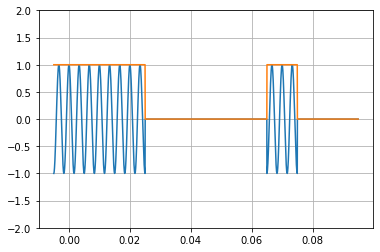

In [5]:
plt.ylim([-2, 2])
plt.grid()
plt.plot(sig_xt.timeAxis(), sig_xt.signal())
plt.plot(sig_st.timeAxis(), sig_st.signal())

Para a transmissão não-coerente:

In [6]:
sig_an = comsig.sigSequ([np.random.randint(0, 2, 10), 360 * np.random.rand(10)], FB)

In [7]:
sig_an.signal()

array([[  1.        ,   0.        ,   1.        ,   1.        ,
          1.        ,   1.        ,   0.        ,   1.        ,
          1.        ,   1.        ],
       [342.97420325, 344.56595099,   3.23153032, 225.18348246,
        345.28103752,  79.65276386, 141.92997421, 198.31957924,
        351.14681183,  20.55767722]])

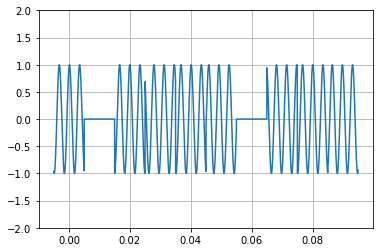

In [8]:
sig_xt, sig_st = ModuleLab8.askxmtr(sig_an, Fs, 'rect', [], 'noncoh', [fc])
plt.ylim([-2, 2])
plt.grid()
plt.plot(sig_xt.timeAxis(), sig_xt.signal())

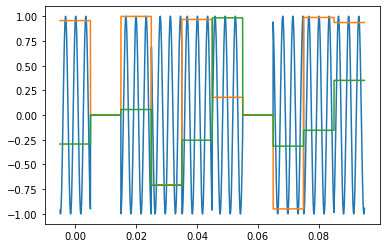

In [9]:
plt.plot(sig_xt.timeAxis(), sig_xt.signal())
plt.plot(sig_st.timeAxis(), sig_st.signal().real)
plt.plot(sig_st.timeAxis(), sig_st.signal().imag)

O comportamento é conforme o esperado. Para a transmissão coerente, não há derivada descontinua entre dois símbolos '1' consecutivos, na não-coerente, há.

## b

In [10]:
reload(ModuleLab8)

<module 'ModuleLab8' from '/home/rcampello/Main/3m/Simulação de sistemas de comunicação/Labs/Lab8/ModuleLab8.py'>

Para transmissão coerente:

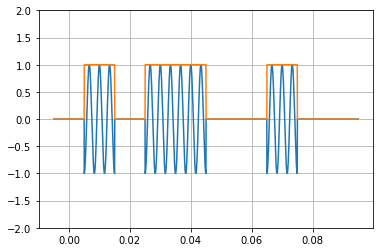

In [11]:
Fs = 44100
FB = 100
fc = 300
sig_an = comsig.sigSequ(np.random.randint(0, 2, 10), FB)


sig_xt, sig_st = ModuleLab8.askxmtr(sig_an, Fs, 'rect', [], 'coh', [fc, 0])
plt.ylim([-2, 2])
plt.grid()
plt.plot(sig_xt.timeAxis(), sig_xt.signal())
plt.plot(sig_st.timeAxis(), sig_st.signal())

In [12]:
sig_bn, sig_bt, sig_wt, ixn = ModuleLab8.askrcvr(sig_xt, 'coh', [fc, 0], [FB, 0], 'rect', [])

In [13]:
errors = sum(sig_an.signal() - sig_bn.signal() > 0.01)
print(errors)

0


O plot abaixo mostra o sinal recebido, o sinal PAM após o filtro casado e os instantes de amostragem. Acima vimos que a implementação do receptor consegue recuperar o sinal.

<StemContainer object of 3 artists>

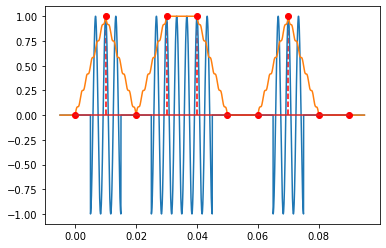

In [14]:
plt.plot(sig_xt.timeAxis(), sig_xt.signal())
plt.plot(sig_bt.timeAxis(), sig_bt.signal())
plt.stem(sig_bt.timeAxis()[ixn], sig_bt.signal()[ixn], linefmt="r--", markerfmt="ro")

Para transmissão não-coerente:

In [15]:
sig_an = comsig.sigSequ([np.random.randint(0, 2, 10), 360 * np.random.rand(10)], FB)

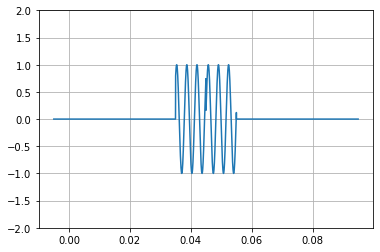

In [16]:
sig_xt, sig_st = ModuleLab8.askxmtr(sig_an, Fs, 'rect', [], 'noncoh', [fc])
plt.ylim([-2, 2])
plt.grid()
plt.plot(sig_xt.timeAxis(), sig_xt.signal())

In [17]:
sig_bn, sig_bt, sig_wt, ixn = ModuleLab8.askrcvr(sig_xt, 'noncoh', [fc, 0], [FB, 0.0], 'rect', [])

In [18]:
errors = sum(sig_an.signal()[0] - sig_bn.signal() > 0.01)
print(errors)

0


<StemContainer object of 3 artists>

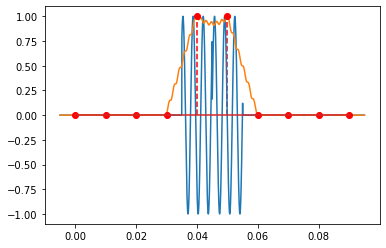

In [19]:
plt.plot(sig_xt.timeAxis(), sig_xt.signal())
plt.plot(sig_bt.timeAxis(), sig_bt.signal())
plt.stem(sig_bt.timeAxis()[ixn], sig_bt.signal()[ixn], linefmt="r--", markerfmt="ro")

Novamente, o receptor consegue decodificar sem erros.